In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import os
import seaborn as sns
import pandas as pd
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [3]:
_ = project_data.raw_matches

In [11]:
pair = (7, 8)

project_data.napari_of_single_match(pair)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7f55f92b6e10>, <Points layer 'n0_zxy_raw' at 0x7f56607a5310>, <Points layer 'n1_zxy_raw' at 0x7f55f69d6610>, <Tracks layer 'final_matches' at 0x7f55e70b88d0>, <Points layer 'Raw IDs' at 0x7f561c76a390>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(vi

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

# Load manual annotations and plot

In [4]:
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/manually_annotated_accuracy.csv"
df = pd.read_csv(fname)

In [18]:
# Get totals for matches and segmentation
non_vnc_fraction = 0.8
num_frames = 8

seg_totals = [project_data.get_centroids_as_numpy(i).shape[0] * non_vnc_fraction for i in range(num_frames)]
df['total_num_neurons'] = seg_totals

In [19]:
all_matches = project_data.raw_matches

match_totals = [all_matches[(i, i+1)].num_possible_matches*non_vnc_fraction for i in range(num_frames)]
df['total_num_matches'] = match_totals

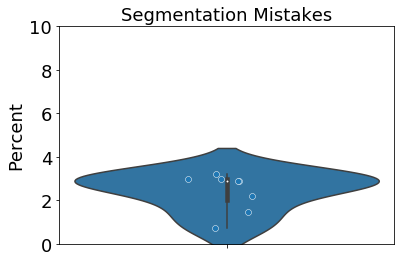

In [120]:
df['seg_fraction_mistakes'] = 100*(df['Segmentation FN'] + df['Segmentation Undersegmentation']) / df['total_num_neurons']
df['match_fraction_mistakes'] = 100*(df['Matching Incorrect'] + df['Matching mismatches']) / df['total_num_matches']
# sns.violinplot(y=['seg_fraction_mistakes', 'match_fraction_mistakes'], data=df)
sns.violinplot(y=df['seg_fraction_mistakes'])
sns.scatterplot(x=0.05*np.random.randn(len(df)), y='seg_fraction_mistakes', data=df)

fontsize = 18
plt.ylim([0, 10])
plt.yticks(fontsize=fontsize)
plt.ylabel("Percent", fontsize=fontsize)
plt.title("Segmentation Mistakes", fontsize=fontsize);

fname = os.path.join(project_data.project_dir, 'plots', "seg_mistakes.png")
plt.savefig(fname)

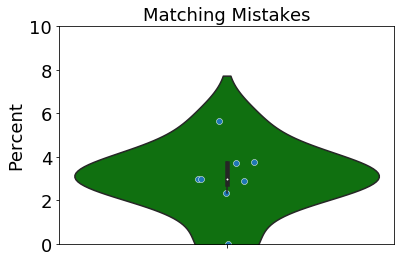

In [119]:
fontsize = 18

sns.violinplot(y=df['match_fraction_mistakes'], color='green')
sns.scatterplot(x=0.05*np.random.randn(len(df)), y=df['match_fraction_mistakes'])
plt.ylim([0, 10])
plt.yticks(fontsize=fontsize)
plt.ylabel("Percent", fontsize=fontsize)
plt.title("Matching Mistakes", fontsize=fontsize);

fname = os.path.join(project_data.project_dir, 'plots', "match_mistakes.png")
plt.savefig(fname)

# Overall length of tracklets; no ground truth

In [74]:
df_tracklets = project_data.df_all_tracklets

In [200]:
names = list(df_tracklets.columns.levels[0])

# fps = 1

df_lens = [df_tracklets[n]['z'].count() for n in names]

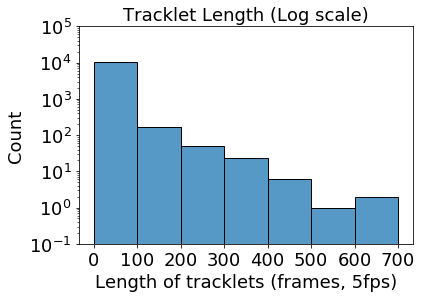

In [206]:
ax = sns.histplot(df_lens, binwidth=100)
fontsize = 18
ax.set_yscale('log')
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.ylim([0.1, 1e5])
plt.ylabel("Count", fontsize=fontsize)
plt.xlabel("Length of tracklets (frames, 5fps)", fontsize=fontsize)
plt.title("Tracklet Length (Log scale)", fontsize=fontsize)

fname = os.path.join(project_data.project_dir, 'plots', "tracklet_lengths.png")
plt.savefig(fname, bbox_inches='tight')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


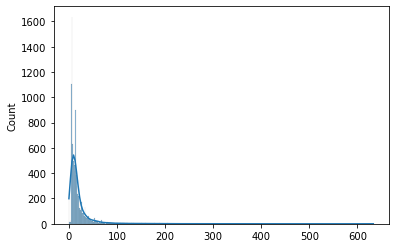

In [90]:
sns.histplot(df_lens, kde=True)


# Visualize tracklets

In [184]:
# Only allow a subset of tracklets to be used
len_thresh = 50
names = list(df_tracklets.columns.levels[0])
to_drop = [names[i] for i, l in enumerate(df_lens) if l < len_thresh]
df_long_tracklets = pd.DataFrame(df_tracklets.drop(to_drop, axis=1, level=0))
df_long_tracklets.head()

bodyparts   neuron7                                     neuron15              \
coords            z           x           y likelihood         z           x   
0          5.696296  314.941645  412.728781   0.367237  8.836602  259.777049   
1          4.795739  292.147426  391.699531   0.362240  8.015301  280.612151   
2          5.515992  282.313903  390.375936   0.409311  7.341838  284.535889   
3          5.093347  266.466467  380.732978   0.359474  8.005810  271.755856   
4          4.490860  263.258349  396.671695   0.339637  8.779265  248.517168   

bodyparts                         neuron24              ... neuron13040  \
coords              y likelihood         z           x  ...           y   
0          513.462898   0.351113  8.420963  270.610345  ...         NaN   
1          506.728452   0.317941  8.166185  262.128819  ...         NaN   
2          503.032866   0.377364  9.241837  254.253171  ...         NaN   
3          495.156528   0.345689  8.868590  238.039939  ...         NaN   
4          512.450987   0.470636  9.101566  227.651305  ...         NaN   

bodyparts            neuron13068                    neuron13400          \
coords    likelihood           z   x   y likelihood           z   x   y   
0                NaN         NaN NaN NaN        NaN         NaN NaN NaN   
1                NaN         NaN NaN NaN        NaN         NaN NaN NaN   
2                NaN         NaN NaN NaN        NaN         NaN NaN NaN   
3                NaN         NaN NaN NaN        NaN         NaN NaN NaN   
4                NaN         NaN NaN NaN        NaN         NaN NaN NaN   

bodyparts             
coords    likelihood  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 208 columns]

208


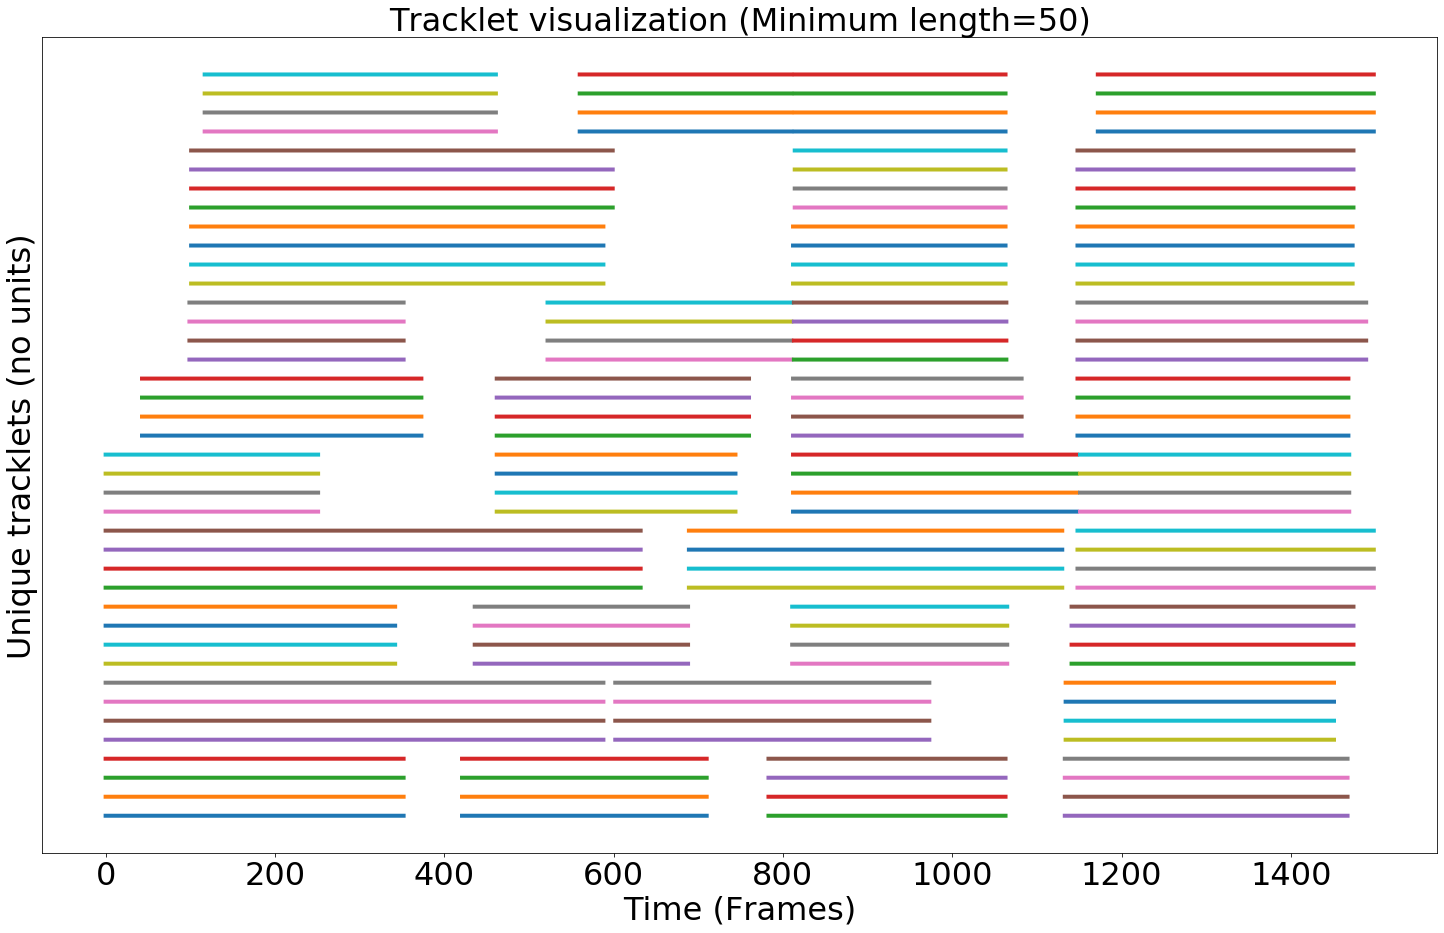

In [199]:
plt.figure(figsize=(25,15))
fontsize = 32

names = list(df_long_tracklets.columns.get_level_values(0))

max_tracklets = 40
available_z = list(range(max_tracklets))
tracklet_x_margin = 2
all_active_starts = {}
all_active_ends = {}

print(len(names))

for n in names:
    z_series = df_long_tracklets[n]['z']
    end = z_series.last_valid_index()
    
    if len(available_z) == 0:
        start = z_series.first_valid_index()
        # Try to find a tracklet that has ended
        for z_old, end_old in all_active_ends.items():
            if start > end_old + tracklet_x_margin:
                z_current = z_old
                all_active_ends[z_old] = end
                break
        else:
            # print("No available z level, skipping")
            continue
    else:
        z_current = available_z.pop(0)
        
    all_active_ends[z_current] = end
    
    z_binary = [z_current if ~np.isnan(z) else np.nan for z in z_series]
    # plt.plot(z_series, lw=4)
    plt.plot(z_binary, lw=4)
    z_current -= 1
    
plt.title(f"Tracklet visualization (Minimum length={len_thresh})", fontsize=fontsize)
plt.yticks([]);
plt.ylabel("Unique tracklets (no units)", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.xlabel("Time (Frames)", fontsize=fontsize)
# project_data.shade_axis_using_behavior()

# fname = os.path.join(project_data.project_dir, 'plots', "tracklet_visualization_shaded.png")
fname = os.path.join(project_data.project_dir, 'plots', "tracklet_visualization.png")
plt.savefig(fname)

In [155]:
df_long_tracklets.columns.get_level_values(0)


Index(['neuron15', 'neuron15', 'neuron15', 'neuron15', 'neuron41', 'neuron41',
       'neuron41', 'neuron41', 'neuron1672', 'neuron1672', 'neuron1672',
       'neuron1672'],
      dtype='object', name='bodyparts')

In [189]:
# names